In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# bring in the data sources
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [3]:
# combine the DataFrames
rawData_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

# preview the raw DataFrame
rawData_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Prepare the Data

In [4]:
# display the count of unique Mouse IDs
print(f"The given dataset contains {rawData_df.nunique()['Mouse ID']} unique instances of Mouse ID.")

The given dataset contains 249 unique instances of Mouse ID.


In [5]:
# check for duplicated timepoints

# create a list of the unique Mouse IDs
uniqueMice = rawData_df['Mouse ID'].unique().tolist()

# create a list of the Mouse IDs
allMice = rawData_df['Mouse ID'].tolist()

# create a copy of the raw data
cleanData_df = rawData_df.copy(deep=True)

# iterate through the list
for mouse in uniqueMice:
    
    # create a DataFrame from the raw data where the Mouse ID matches the iterator
    mouse_df = rawData_df.loc[rawData_df['Mouse ID'] == mouse, :]
    
    # get the maximum count of repeated Timepoint values
    timepoint_duplicate = max(mouse_df['Timepoint'].value_counts().tolist())
    
    # if the count is greater than 1, there is a duplicate
    if timepoint_duplicate > 1:
        print(f'The Mouse ID, {mouse}, contains {timepoint_duplicate}x duplicated Timepoint data.')
        print()
        print(mouse_df.head())
        
        # remove the affected Mouse ID from the raw data
        cleanData_df = cleanData_df.loc[cleanData_df['Mouse ID'] != mouse, :]

The Mouse ID, g989, contains 2x duplicated Timepoint data.

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  


In [6]:
# display the cleaned count of unique Mouse IDs
print(f"The cleaned dataset contains {cleanData_df.nunique()['Mouse ID']} unique instances of Mouse ID.")

The cleaned dataset contains 248 unique instances of Mouse ID.


## Generate Summary Statistics

In [7]:
# create the statistical groups
groupedData_mean = cleanData_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].map("{:,.2f}".format)
groupedData_median = cleanData_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].map("{:,.2f}".format)
groupedData_std = cleanData_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].map("{:,.2f}".format)
groupedData_var = cleanData_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].map("{:,.2f}".format)
groupedData_sem = cleanData_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].map("{:,.2f}".format)

In [8]:
# because the five stats groups were grouped by the same column, their index columns will be identical
summary0_df = pd.DataFrame({
            "Mean": groupedData_mean,
            "Median": groupedData_median,
            "St.Dev": groupedData_std,
            "Variance": groupedData_var,
            "SEM": groupedData_sem})

# display all 10 entries of the first statistical summary DataFrame
summary0_df.head(10)

,Mean,Median,St.Dev,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.32,50.45,6.62,43.85,0.54
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


In [9]:
# recreate the 'summary0_df' DataFrame using the pd.DataFrame.agg method in a single line of code
summary1_df = cleanData_df.agg({"Tumor Volume (mm3)": ["mean", "median", "std", "var", "sem"]}).round(2)
summary1_df.head()

,Tumor Volume (mm3)
mean,50.44
median,48.93
std,8.91
var,79.46
sem,0.21


## Create Bar Charts and a Pie Chart

In [10]:
timePoints_df = cleanData_df["Drug Regimen"].value_counts()

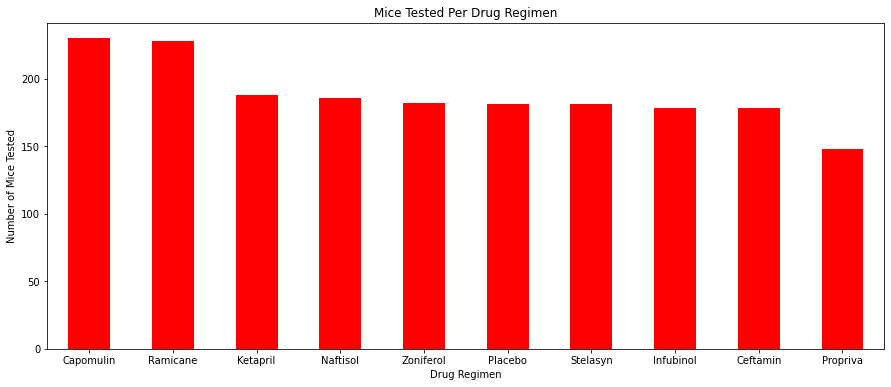

In [11]:
# create one bar chart using DataFrame.plot
figure1 = timePoints_df.plot(
                        kind="bar",
                        facecolor="red",
                        figsize=(15,6),
                        width=0.5,
                        rot=0,
                        title="Mice Tested Per Drug Regimen",
                        xlabel="Drug Regimen",
                        ylabel="Number of Mice Tested")
plt.show()

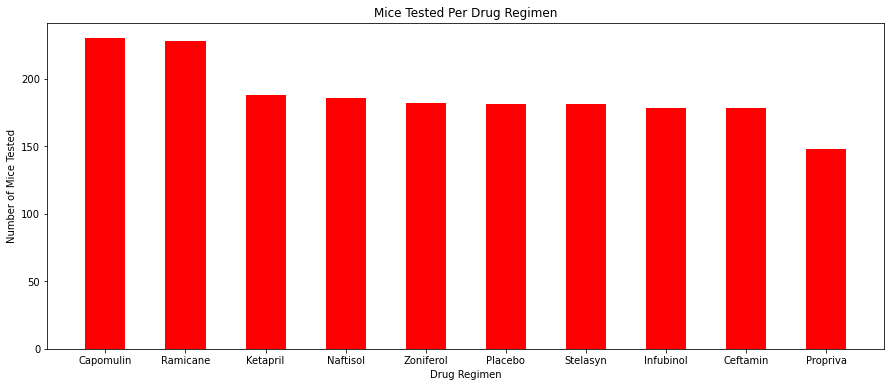

In [12]:
# create one bar chart using plt.bar
plt.figure(figsize=(15,6))
plt.bar(timePoints_df.keys(), timePoints_df.tolist(), color="red", align="center", width=0.5)
plt.xticks([value for value in timePoints_df.keys()])
plt.title("Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [13]:
mouseSexes_df = cleanData_df['Sex'].value_counts()

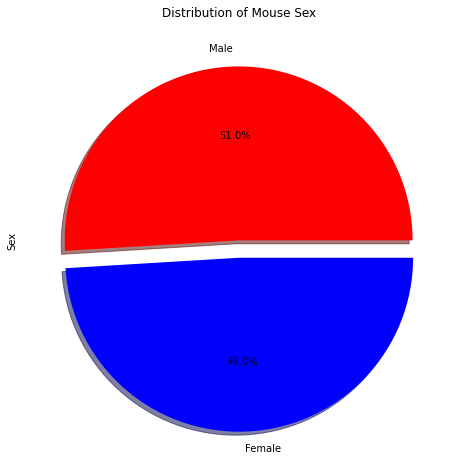

In [14]:
# create one pie chart using DataFrame.plot
figure2 = mouseSexes_df.plot(
                        kind="pie",
                        explode=[0, 0.1],
                        colors=["red", "blue"],
                        shadow=True,
                        title="Distribution of Mouse Sex",
                        autopct="%1.1f%%",
                        figsize=(8,8))
plt.show()

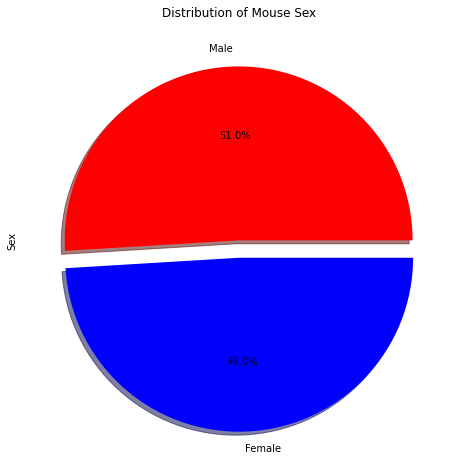

In [15]:
# create one pie chart using plt.pie
plt.figure(figsize=(8,8))
plt.pie(mouseSexes_df.tolist(), 
        explode=[0, 0.1], 
        labels=mouseSexes_df.keys(), 
        colors=["red", "blue"], 
        shadow=True, 
        autopct="%1.1f%%")
plt.title("Distribution of Mouse Sex")
plt.ylabel("Sex")
plt.show()

## Calculate Quartiles, Find Outliers, and Create a Box Plot

In [78]:
# create a new DataFrame that only contains the greatest Timepoint
lastTimepoint_df = cleanData_df.groupby(["Mouse ID"]).max()

# merge this DataFrame with the original cleaned DataFrame into a new one
newCleanData_df = pd.merge(cleanData_df, lastTimepoint_df, on="Mouse ID", how="inner")

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45,45.000000,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,45,45.000000,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,45,45.000000,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,45,45.000000,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,45,45.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,Naftisol,Male,9,30,45,73.867845,4
1876,z969,Naftisol,Male,9,30,30,65.841013,3,Naftisol,Male,9,30,45,73.867845,4
1877,z969,Naftisol,Male,9,30,35,69.176246,4,Naftisol,Male,9,30,45,73.867845,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4,Naftisol,Male,9,30,45,73.867845,4


In [81]:
# create the lists
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumorData = []
targetedTreatment = treatments[0]

# iterate through the effective drugs
for i in range(len(treatments)):
    
    # extract the drug specific rows
    drugData_df = newCleanData_df.loc[newCleanData_df["Drug Regimen_y"] == treatments[i], :]
    
    # append the tumor volumes list to the tumorData list
    tumorData.append(drugData_df["Tumor Volume (mm3)_y"])
    
    # calculate the quartiles from the extracted data
    quartiles = drugData_df["Tumor Volume (mm3)_y"].quantile([0.25, 0.50, 0.75])
    
    # get the upper/lower quartiles
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    iqr = upperQ - lowerQ
    
    # calculate the upper/lower bounds and iqr
    lowerBound = lowerQ - (1.5 * iqr)
    upperBound = upperQ + (1.5 * iqr)
    
    # specify the corresponding drug to the following printed information
    print(f"{treatments[i]}")
    
    # print the quartile/IQR data
    print(f"Lower Quartile:\t{lowerQ:,.2f}")
    print(f"Upper Quartile:\t{upperQ:,.2f}")
    print(f"IQR:\t\t{iqr:,.2f}")
    print(f"Median:\t\t{quartiles[0.50]:,.2f}")
    
    # print the boundaries
    print(f"Lower Bound:\t{lowerBound:,.2f}")
    print(f"Upper Bound:\t{upperBound:,.2f}")
    
    # retreive the outliers
    outliers_list = drugData_df.loc[(
                                 drugData_df["Tumor Volume (mm3)_y"] < lowerBound) | 
                                 (drugData_df["Tumor Volume (mm3)_y"] > upperBound), :]["Mouse ID"].tolist()
    
    # get the amount of outliers
    outlier_count = len(outliers_list)
    
    # report the outliers if they exist
    if outlier_count > 0:
        print(f"* This drug contains {outlier_count} outlier(s).")
        print(f"* Outliers: {outliers_list}")
    print("-----------------------------------")

Capomulin
Lower Quartile:	45.12
Upper Quartile:	46.81
IQR:		1.69
Median:		45.89
Lower Bound:	42.58
Upper Bound:	49.35
-----------------------------------
Ramicane
Lower Quartile:	45.00
Upper Quartile:	46.34
IQR:		1.34
Median:		45.52
Lower Bound:	42.98
Upper Bound:	48.36
-----------------------------------
Infubinol
Lower Quartile:	57.03
Upper Quartile:	66.20
IQR:		9.17
Median:		62.28
Lower Bound:	43.28
Upper Bound:	79.94
-----------------------------------
Ceftamin
Lower Quartile:	59.74
Upper Quartile:	64.73
IQR:		4.99
Median:		62.42
Lower Bound:	52.26
Upper Bound:	72.21
* This drug contains 13 outlier(s).
* Outliers: ['b447', 'f436', 'f436', 'f436', 'f436', 'h531', 'h531', 'l558', 'l558', 'l558', 't573', 'u153', 'x226']
-----------------------------------


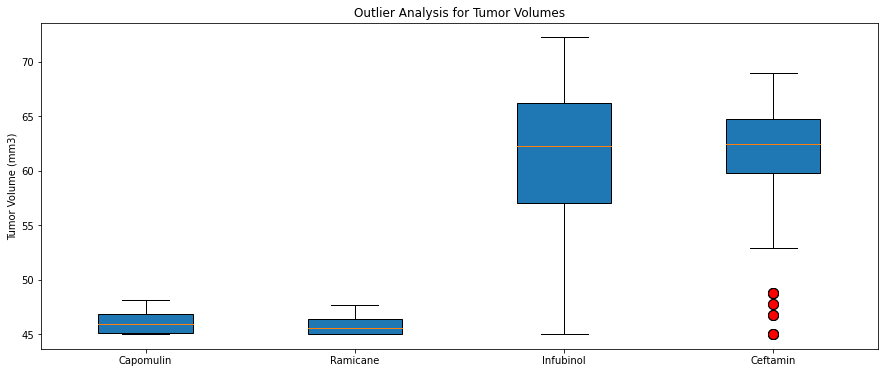

In [33]:
# create the subplot
fig, ax0 = plt.subplots(figsize=(15,6))

# define the plot
ax0.set_title("Outlier Analysis for Tumor Volumes")
ax0.set_ylabel("Tumor Volume (mm3)")
ax0.boxplot(tumorData,
           labels=treatments,
           patch_artist=True,
           flierprops={"marker": "o", "markersize": 10, "markerfacecolor": "red"})

# show the plot
plt.show()

## Create a Line Plot and a Scatter Plot

In [19]:
# get a list of the available mice
availableMice = cleanData_df.loc[cleanData_df["Drug Regimen"] == targetedTreatment]["Mouse ID"].unique().tolist()

# show the availabe mice
print(availableMice)

['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957', 't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246', 'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557', 'r157']


In [20]:
# select a mouse
mouse = input(f"Enter a Mouse ID from the preceding list. ")

Enter a Mouse ID from the preceding list. l509


In [21]:
# extract the tumor volume data
yList0 = cleanData_df.loc[cleanData_df["Mouse ID"] == mouse]["Tumor Volume (mm3)"].tolist()

# extract the timepoint data
xList0 = cleanData_df.loc[cleanData_df["Mouse ID"] == mouse]["Timepoint"].tolist()

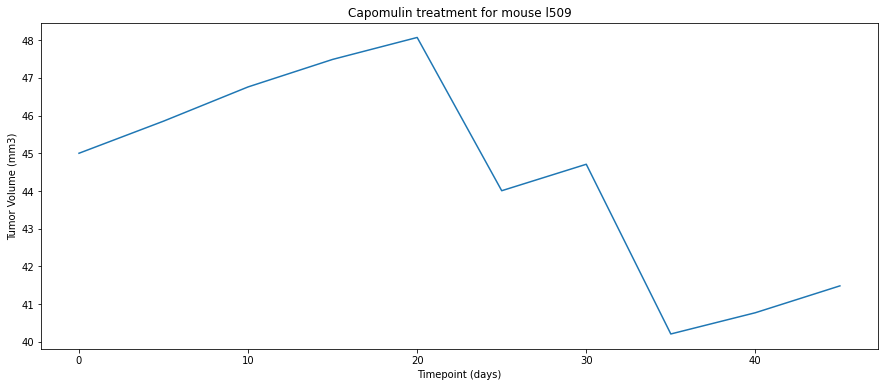

In [22]:
# plot the extracted data
plt.figure(figsize=(15,6))
plt.plot(xList0, yList0)
plt.title(f"{targetedTreatment} treatment for mouse {mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [23]:
# group the data
groupedData_df = cleanData_df.loc[cleanData_df["Drug Regimen"] == targetedTreatment, :].groupby(["Mouse ID"]).mean()

# extract the tumor volume data
yList1 = groupedData_df["Tumor Volume (mm3)"]

xList1 = groupedData_df["Weight (g)"]

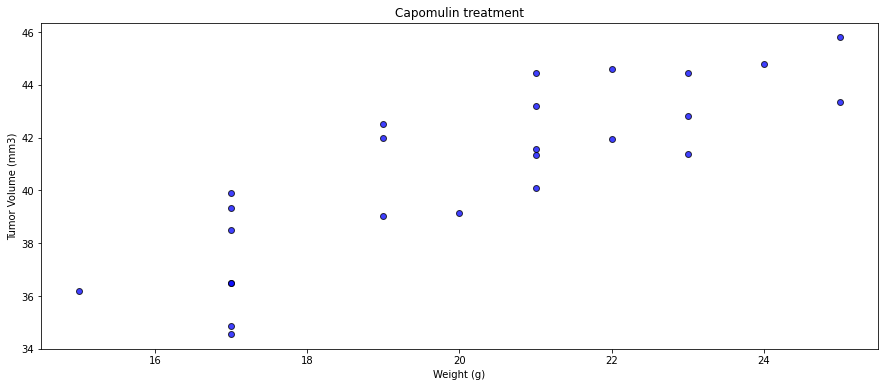

In [24]:
# plot the extracted data
plt.figure(figsize=(15,6))
plt.scatter(xList1, yList1, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"{treatments[0]} treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Calculate Correlation and Regression

In [25]:
# calculate the correlation
pR = st.pearsonr(xList1, yList1)
correlation = pR[0]

# display the correlation factor between tumor volume and mouse weight
print(f"The correlation between Tumor Volume and Mouse Weight is {correlation:,.2f}.")

The correlation between Tumor Volume and Mouse Weight is 0.84.


In [26]:
# calculate the linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xList1, yList1)

# set the regression values
regress_values = xList1 * slope + intercept

# define the line equation
line_equation = f"y = {slope:,.2f}x + {intercept:,.2f}"

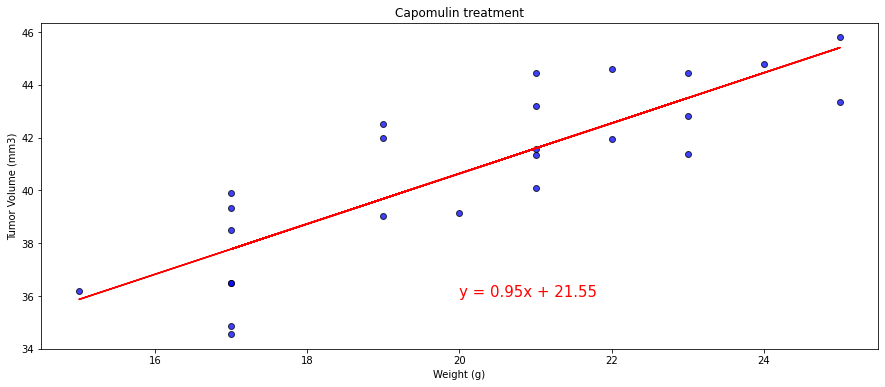

In [27]:
# plot the linear regression on top of the previous scatter plot
plt.figure(figsize=(15,6))
plt.scatter(xList1, yList1, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(xList1, regress_values, "r-")
plt.annotate(line_equation, (20, 36), fontsize=15, color="red")
plt.title(f"{treatments[0]} treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()